## RNN Example for Time Series
----
----
## Data
Release: Advance Monthly Sales for Retail and Food Services
Units: Millions of Dollars, Not Seasonally Adjusted

Frequency: Monthly

The value for the most recent month is an advance estimate that is based on data from a subsample of firms from the larger Monthly Retail Trade Survey. The advance estimate will be superseded in following months by revised estimates derived from the larger Monthly Retail Trade Survey. The associated series from the Monthly Retail Trade Survey is available at https://fred.stlouisfed.org/series/MRTSSM448USN

Information about the Advance Monthly Retail Sales Survey can be found on the Census website at https://www.census.gov/retail/marts/about_the_surveys.html

Suggested Citation: U.S. Census Bureau, Advance Retail Sales: Clothing and Clothing Accessory Stores [RSCCASN], retrieved from FRED, Federal Reserve Bank of St. Louis; https://fred.stlouisfed.org/series/RSCCASN, November 16, 2019.

https://fred.stlouisfed.org/series/RSCCASN

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r'C:\Users\Data\data tensorflow\RSCCASN.csv', index_col='DATE', parse_dates = True)

In [3]:
df.head()

,RSCCASN
DATE,
1992-01-01,6938
1992-02-01,7524
1992-03-01,8475
1992-04-01,9401
1992-05-01,9558


In [4]:
# rename colomn
df.columns = ['Sale']

In [5]:
df.head()

,Sale
DATE,
1992-01-01,6938
1992-02-01,7524
1992-03-01,8475
1992-04-01,9401
1992-05-01,9558


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 334 entries, 1992-01-01 to 2019-10-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Sale    334 non-null    int64
dtypes: int64(1)
memory usage: 5.2 KB


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Sale,334.0,16325.095808,5369.839014,6938.0,12298.5,15878.5,19772.5,34706.0


In [8]:
plt.style.use(['science','notebook','grid'])

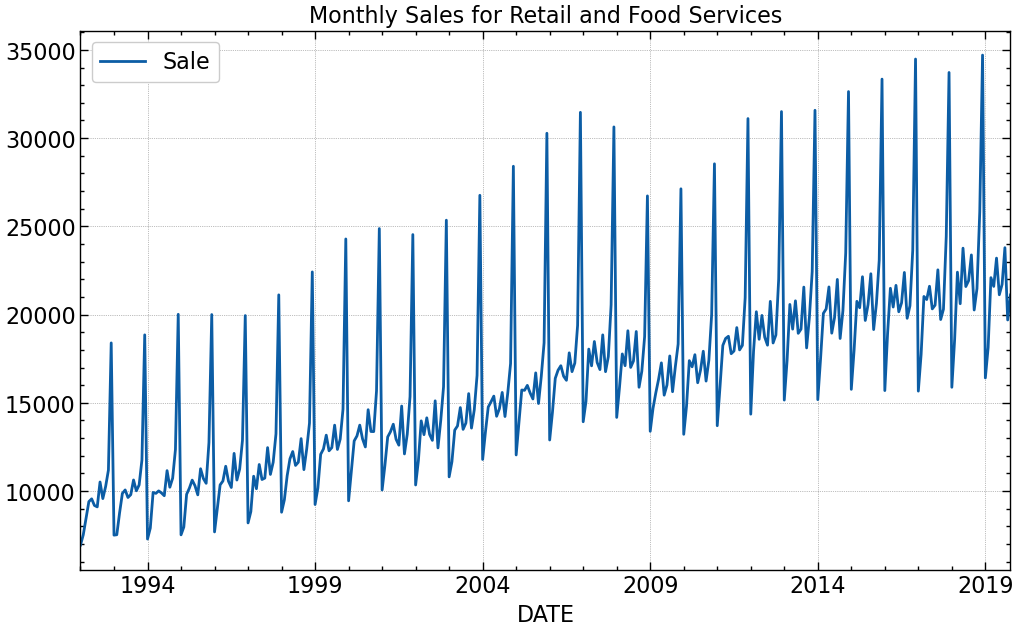

In [9]:
# visual dataframe
df.plot(figsize=(12, 7), title='Monthly Sales for Retail and Food Services');

-----
-----
## Train test split
- membagi data training dan testing
- data testing 1.5 tahun atau 18 bulan

In [10]:
len(df)

334

In [11]:
test_point  = 18 # data testing 18 bulan

In [12]:
test_index = len(df) - test_point

In [13]:
test_index

316

In [14]:
train = df.iloc[:test_index]

In [15]:
test = df.iloc[test_index:]

In [16]:
train

,Sale
DATE,
1992-01-01,6938
1992-02-01,7524
1992-03-01,8475
1992-04-01,9401
1992-05-01,9558
...,...
2017-12-01,33720
2018-01-01,15881
2018-02-01,18585


In [17]:
test

,Sale
DATE,
2018-05-01,23764
2018-06-01,21589
2018-07-01,21919
2018-08-01,23381
2018-09-01,20260
2018-10-01,21473
2018-11-01,25831
2018-12-01,34706
2019-01-01,16410


In [18]:
train.shape, test.shape

((316, 1), (18, 1))

------
-----
## Scaler data

In [19]:
from sklearn.preprocessing import MinMaxScaler

In [20]:
scaler = MinMaxScaler()

In [21]:
scaler_train = scaler.fit_transform(train)

In [22]:
scaler_test = scaler.transform(test)

-----
-----
## Timeseries Generator

TimeseriesGenerator is a class in the keras library that is used to generate time series data for training machine learning models. It takes in a sequence of data-points gathered at equal intervals, along with time series parameters such as stride, length of history, and so on, to produce batches for training/validation.

In [23]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [24]:
help(TimeseriesGenerator)

Help on class TimeseriesGenerator in module keras.src.preprocessing.sequence:

class TimeseriesGenerator(keras.src.utils.data_utils.Sequence)
 |  TimeseriesGenerator(data, targets, length, sampling_rate=1, stride=1, start_index=0, end_index=None, shuffle=False, reverse=False, batch_size=128)
 |  
 |  Utility class for generating batches of temporal data.
 |  
 |  Deprecated: `tf.keras.preprocessing.sequence.TimeseriesGenerator` does not
 |  operate on tensors and is not recommended for new code. Prefer using a
 |  `tf.data.Dataset` which provides a more efficient and flexible mechanism for
 |  batching, shuffling, and windowing input. See the
 |  [tf.data guide](https://www.tensorflow.org/guide/data) for more details.
 |  
 |  This class takes in a sequence of data-points gathered at
 |  equal intervals, along with time series parameters such as
 |  stride, length of history, etc., to produce batches for
 |  training/validation.
 |  
 |  Arguments:
 |      data: Indexable generator (su

In [25]:
# mendefinisikan 12 bulan sebelumnya untuk mendapatkan prediksi di bulan berikutya
length = 12
generator = TimeseriesGenerator(scaler_train, scaler_train, length=length, batch_size=1)

In [26]:
# menampikan data generator pertama
X,y  = generator[0]

In [27]:
print(f'Nilai array : {X.flatten()} \n')
print(f'Prediksi : {y}')

Nilai array : [0.         0.02127505 0.05580163 0.08942056 0.09512053 0.08146965
 0.07860151 0.12979233 0.09566512 0.1203892  0.15426227 0.41595266] 

Prediksi : [[0.02047633]]


----
----
## Create Model LSTM

In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
import tensorflow as tf

In [29]:
tf.random.set_seed(47) # seed random 

In [30]:
n_features = scaler_train.shape[1]
n_features 

1

In [31]:
# model sequential
model = Sequential()

# LSTM layers
model.add(LSTM(100, input_shape=(length, n_features), activation='relu'))

# Output layers
model.add(Dense(1))

# compile model
model.compile(loss='mse', optimizer='adam')

In [32]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100)               40800     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 40901 (159.77 KB)
Trainable params: 40901 (159.77 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


---
---
## Add Earlystopping and Validation Generator

In [33]:
from tensorflow.keras.callbacks import EarlyStopping

In [34]:
# earlystopping
early_stop  = EarlyStopping(monitor='val_loss', patience=2)

In [35]:
# validation generator
validation_generator = TimeseriesGenerator(scaler_test, scaler_test, length=length, batch_size=1)

---
---
## Fitting Model

In [36]:
model.fit(generator, epochs=20, 
          validation_data= validation_generator,
          callbacks =[early_stop]
         )

Epoch 1/20
304/304 [==============================] - 6s 10ms/step - loss: 0.0258 - val_loss: 0.0097
Epoch 2/20
304/304 [==============================] - 3s 9ms/step - loss: 0.0190 - val_loss: 0.0046
Epoch 3/20
304/304 [==============================] - 3s 10ms/step - loss: 0.0110 - val_loss: 0.0016
Epoch 4/20
304/304 [==============================] - 3s 10ms/step - loss: 0.0044 - val_loss: 0.0010
Epoch 5/20
304/304 [==============================] - 3s 10ms/step - loss: 0.0031 - val_loss: 0.0038
Epoch 6/20
304/304 [==============================] - 3s 9ms/step - loss: 0.0021 - val_loss: 2.2337e-04
Epoch 7/20
304/304 [==============================] - 3s 9ms/step - loss: 0.0015 - val_loss: 0.0016
Epoch 8/20
304/304 [==============================] - 3s 9ms/step - loss: 0.0016 - val_loss: 0.0011


In [37]:
losses = pd.DataFrame(model.history.history)

In [38]:
losses

,loss,val_loss
0,0.025802,0.009660
1,0.018986,0.004571
2,0.011009,0.001613
3,0.004445,0.001025
4,0.003075,0.003798
5,0.002095,0.000223
6,0.001507,0.001606
7,0.001630,0.001118


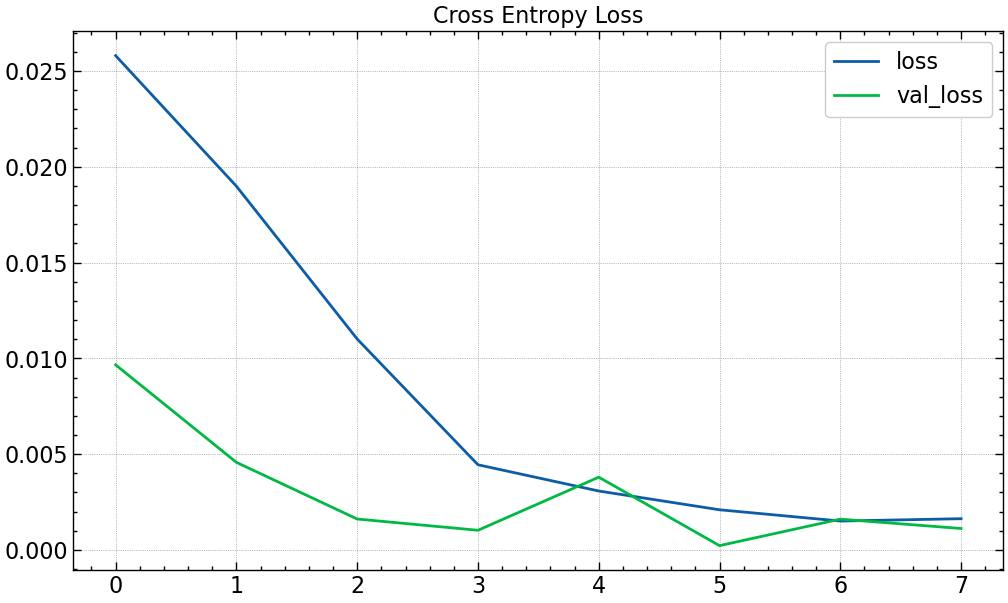

In [39]:
losses.plot(figsize=(12, 7), title='Cross Entropy Loss');

## Evaluation on data test

In [40]:
test_prediction =[]
first_evaluation_batch = scaler_train[-length:]
current_batch = first_evaluation_batch.reshape((1, length, n_features))

for i in range(len(test)):
    # current batch prediction
    current_pred = model.predict(current_batch)[0]
    # store prediction
    test_prediction.append(current_pred)
    # update batch | prediction | drop first values
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]], axis=1)

1/1 [==============================] - 0s 37ms/step


-----
## inverse transform and compire

In [41]:
true_prediction = scaler.inverse_transform(test_prediction)

In [42]:
true_prediction

array([[21937.44150448],
       [20841.13809156],
       [21076.03316259],
       [22927.35292864],
       [20459.14383221],
       [21070.24106741],
       [25039.55010653],
       [34649.67196178],
       [16632.15977144],
       [18986.34930706],
       [22595.40086126],
       [21050.38902235],
       [22304.8126936 ],
       [21369.60767412],
       [21625.70102549],
       [23359.53221226],
       [21187.41607237],
       [21824.86504221]])

In [43]:
test['prediction'] = true_prediction

C:\Users\ibrahim\AppData\Local\Temp\ipykernel_7568\2961615516.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['prediction'] = true_prediction


In [44]:
test

,Sale,prediction
DATE,,
2018-05-01,23764,21937.441504
2018-06-01,21589,20841.138092
2018-07-01,21919,21076.033163
2018-08-01,23381,22927.352929
2018-09-01,20260,20459.143832
2018-10-01,21473,21070.241067
2018-11-01,25831,25039.550107
2018-12-01,34706,34649.671962
2019-01-01,16410,16632.159771


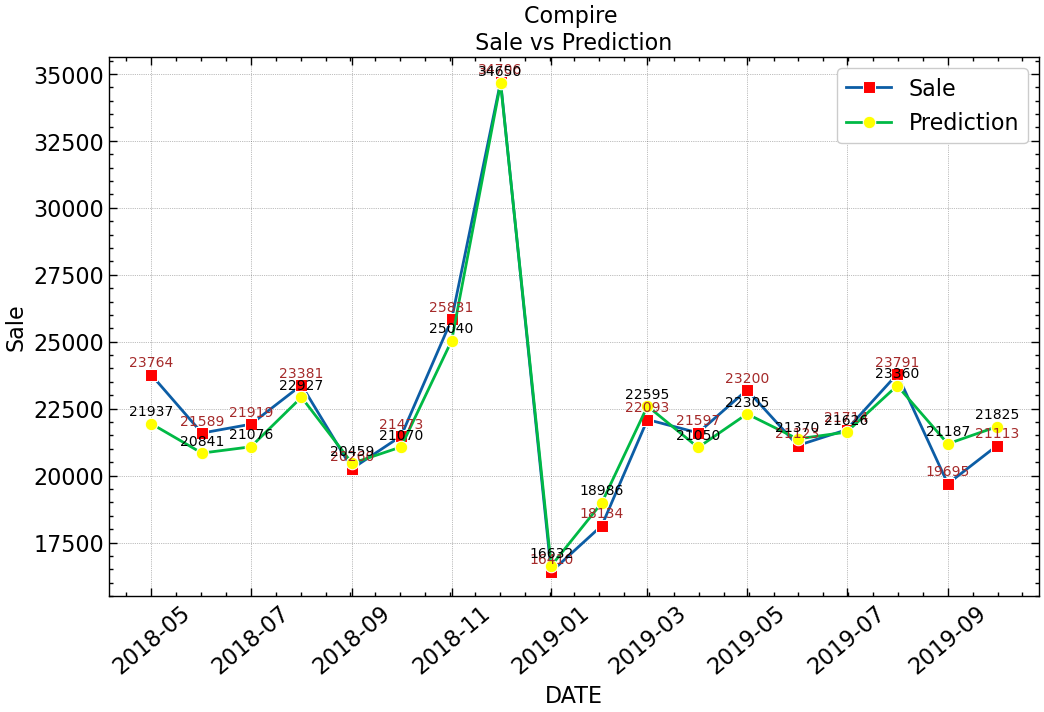

In [45]:
plt.figure(figsize=(12, 7), dpi=100)

sns.lineplot(x= test.index, y='Sale', data=test, marker='s', markerfacecolor='red', markersize=9, label='Sale')

for x,y in zip(test.index, test['Sale']):
    plt.text(x =x,
             y =y +300,
             s ='{:.0f}'.format(y),
             ha ='center',
             color='brown')

sns.lineplot(x= test.index, y='prediction', data=test, marker='o', markerfacecolor='yellow', markersize=9, label='Prediction')
for x,y in zip(test.index, test.prediction):
    plt.text(x =x, 
             y =y + 300, 
             s ='{:.0f}'.format(y),
             ha ='center')
plt.legend();
plt.xticks(rotation=40)
plt.title('Compire \n Sale vs Prediction ');

**Keimpulan :** hasil prediksi menunjukan penjualan meningkat dari tahun ke tahun

## Retrain Forecase full data

In [46]:
# scaler
full_scaler = MinMaxScaler()

In [47]:
# full data scaler
full_data_scaler = full_scaler.fit_transform(df)

In [48]:
# generator
length = 12
full_generator = TimeseriesGenerator(full_data_scaler, full_data_scaler, length=length, batch_size=1)

In [49]:
# model
model =Sequential()
model.add(LSTM(100, input_shape=(length, n_features), activation='relu'))
model.add(Dense(1))
model.compile(loss='mse', optimizer='adam')

In [50]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 100)               40800     
                                                                 
 dense_1 (Dense)             (None, 1)                 101       
                                                                 
Total params: 40901 (159.77 KB)
Trainable params: 40901 (159.77 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [51]:
# fit model
model.fit(full_generator, epochs=8, verbose=1)

Epoch 1/8
322/322 [==============================] - 5s 9ms/step - loss: 0.0222
Epoch 2/8
322/322 [==============================] - 3s 9ms/step - loss: 0.0177
Epoch 3/8
322/322 [==============================] - 3s 9ms/step - loss: 0.0129
Epoch 4/8
322/322 [==============================] - 3s 9ms/step - loss: 0.0052
Epoch 5/8
322/322 [==============================] - 3s 9ms/step - loss: 0.0034
Epoch 6/8
322/322 [==============================] - 3s 9ms/step - loss: 0.0024
Epoch 7/8
322/322 [==============================] - 3s 9ms/step - loss: 0.0020
Epoch 8/8
322/322 [==============================] - 3s 9ms/step - loss: 0.0021


In [52]:
losses = pd.DataFrame(model.history.history)

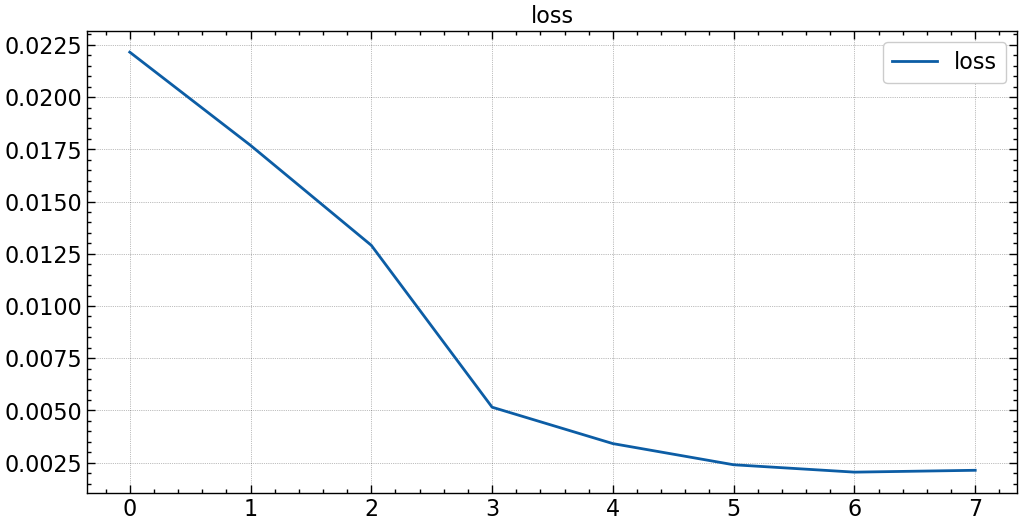

In [53]:
losses.plot(title='loss', figsize=(12, 6));

## Forecast

In [54]:

forecast =[]

periods =12
first_evaluation_batch = full_data_scaler[-length:]
current_batch = first_evaluation_batch.reshape((1, length, n_features))

for i in range(periods):
    # current Prediction
    current_pred = model.predict(current_batch)[0]
    # store pred
    forecast.append(current_pred)
    # update batch | prediction| drop first values
    current_batch = np.append(current_batch[:,1:,:], [[current_pred]], axis=1)

1/1 [==============================] - 0s 40ms/step


In [55]:
# forecase
forecast = full_scaler.inverse_transform(forecast)

In [56]:
forecast

array([[24933.40356493],
       [33105.82774162],
       [16834.25488162],
       [18458.50638819],
       [21458.06223297],
       [21182.10049343],
       [22410.11484194],
       [20935.29833698],
       [21404.32604361],
       [22996.9626236 ],
       [20086.73262167],
       [21132.56991768]])

## Create new timestamp index

In [57]:
df 

,Sale
DATE,
1992-01-01,6938
1992-02-01,7524
1992-03-01,8475
1992-04-01,9401
1992-05-01,9558
...,...
2019-06-01,21123
2019-07-01,21714
2019-08-01,23791


In [58]:
df.tail()

,Sale
DATE,
2019-06-01,21123
2019-07-01,21714
2019-08-01,23791
2019-09-01,19695
2019-10-01,21113


## Pandas freqeuncy string

https://stackoverflow.com/questions/35339139/where-is-the-documentation-on-pandas-freq-tags

https://pandas.pydata.org/docs/user_guide/timeseries.html

MonthBegin `MS` - calendar month begin

In [59]:
forecast_index = pd.date_range(start='2019-12-01', periods=periods, freq='MS')

In [60]:
forecast_index

DatetimeIndex(['2019-12-01', '2020-01-01', '2020-02-01', '2020-03-01',
               '2020-04-01', '2020-05-01', '2020-06-01', '2020-07-01',
               '2020-08-01', '2020-09-01', '2020-10-01', '2020-11-01'],
              dtype='datetime64[ns]', freq='MS')

In [61]:
forecast_df = pd.DataFrame(data=forecast, index=forecast_index, columns=['forecast'])

In [62]:
forecast_df

,forecast
2019-12-01,24933.403565
2020-01-01,33105.827742
2020-02-01,16834.254882
2020-03-01,18458.506388
2020-04-01,21458.062233
2020-05-01,21182.100493
2020-06-01,22410.114842
2020-07-01,20935.298337
2020-08-01,21404.326044
2020-09-01,22996.962624


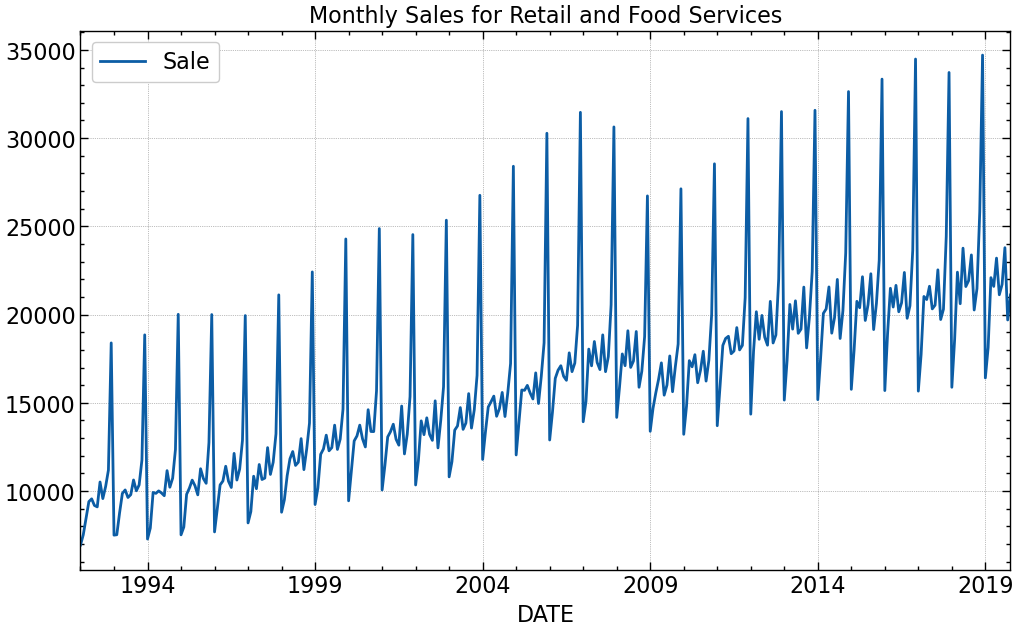

In [63]:
df.plot(figsize=(12, 7), title='Monthly Sales for Retail and Food Services');

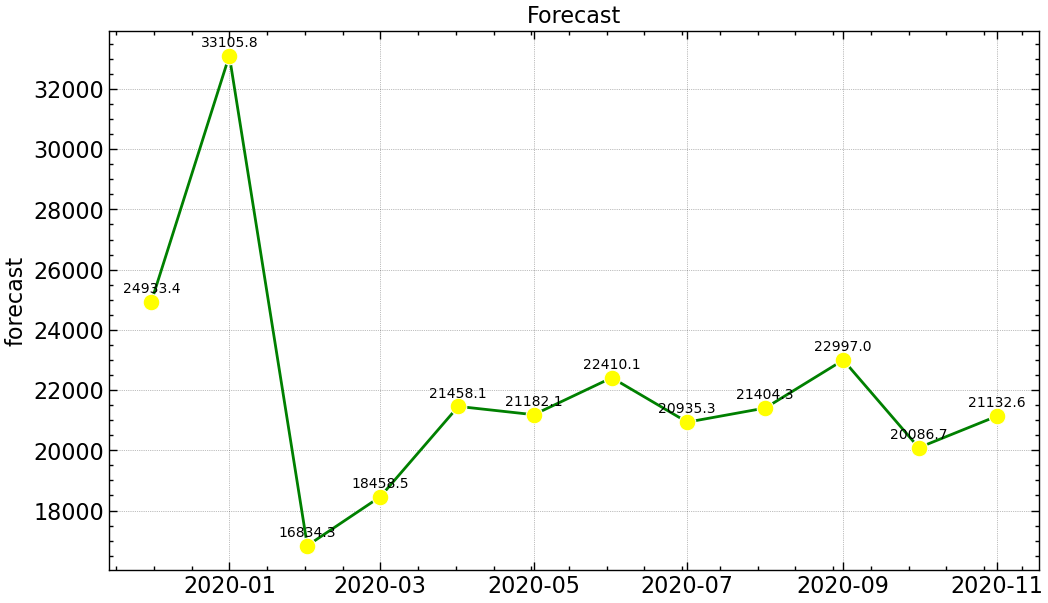

In [64]:
plt.figure(figsize=(12, 7), dpi=100)

sns.lineplot(x=forecast_df.index, y='forecast', data=forecast_df, marker='o', markerfacecolor='yellow', markersize=12, color='green')

for x,y in zip(forecast_df.index, forecast_df.forecast):
    plt.text(x =x, 
             y = y+300, 
             s = '{:.1f}'.format(y),
             ha = 'center')
plt.title('Forecast');

## Join plot

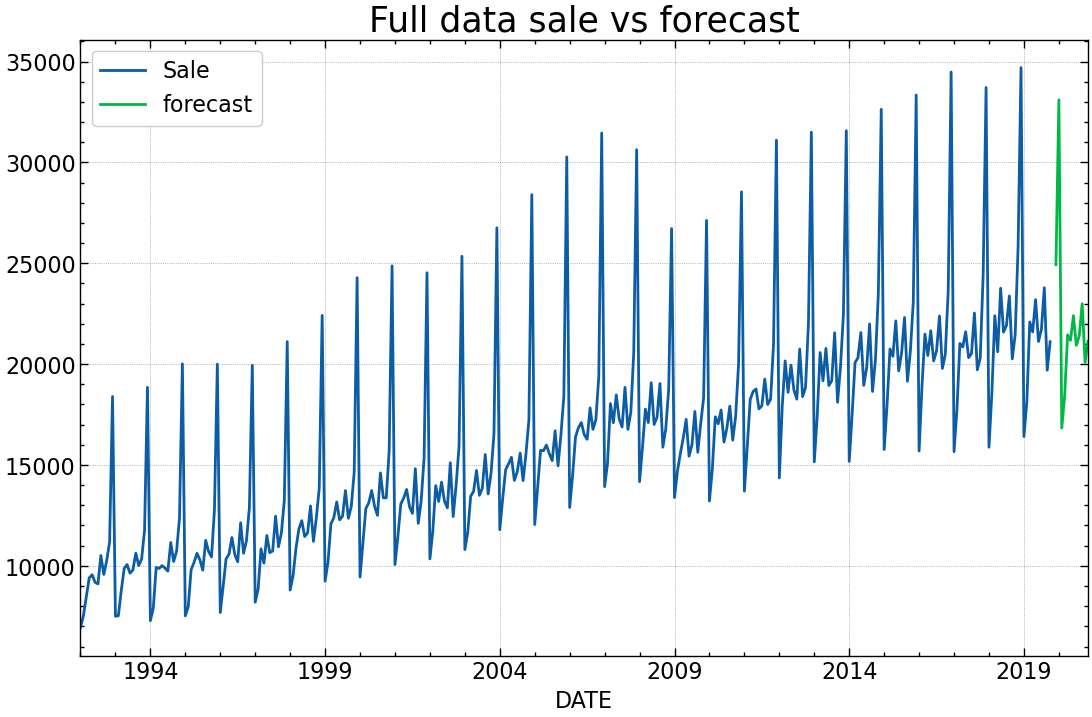

In [65]:
ax = df.plot(figsize=(13, 8))
forecast_df.plot(ax=ax);
plt.title('Full data sale vs forecast', size=25);

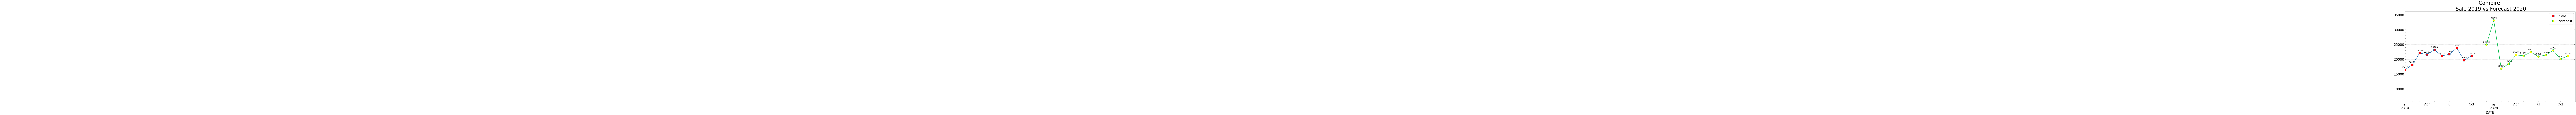

In [66]:
ax = df.plot(figsize=(15, 8), marker='s', markerfacecolor='red', markersize=10)
forecast_df.plot(ax=ax, marker='o', markerfacecolor='yellow', markersize=10);
plt.xlim('2019-01-1', '2020-12-01')

for x,y in zip(df.index, df.Sale):
    label = '{:.0f}'.format(y)
    plt.annotate(label,
                 (x,y),
                 textcoords='offset points',
                 xytext=(0,10),
                 ha='center'
                 )


for x,y in zip(forecast_df.index, forecast_df.forecast):
    label = '{:.0f}'.format(y)
    plt.annotate(label,
                 (x,y),
                 textcoords='offset points',
                 xytext=(0,10),
                 ha='center'
                 )


plt.title('Compire \n Sale 2019 vs Forecast 2020', size=25)
plt.legend()
plt.savefig('compire.png');

<img src='compire_3.png'>

**Kesimpulan :** 
- penjualan di tahun 2019 mengalami mengalami penurunan mungkin di akibatkan oleh `pandemi virus corona` di seluruh dunia


- hasil permodelan forecase di tahun 2020 di bulan januari mengalami peningkatan penjualan yang siknifikan sebesar `33106` dibanding tahun 2019 sebesar `16410` tetapi di bulan-bulan berikutya penjulan kembali merosot seperti di tahun 2019 mungkin diakibatkan pandemi masih belum terkendali